## Data Exploration 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
merged_data_df = pd.read_csv('derived_data/train_data_merged_2016.csv')

In [3]:
merged_data_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [4]:
merged_data_df.shape

(90275, 60)

## Check the Transaction Date Range 

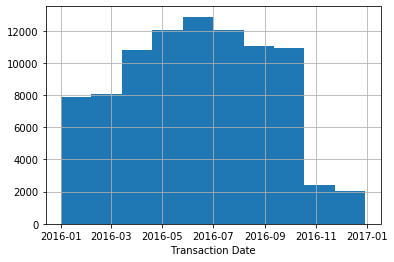

In [5]:
pd.to_datetime(merged_data_df.transactiondate).hist()
plt.xlabel("Transaction Date")
plt.show()

In [6]:
pd.to_datetime(merged_data_df.transactiondate).min()

Timestamp('2016-01-01 00:00:00')

In [7]:
pd.to_datetime(merged_data_df.transactiondate).max()

Timestamp('2016-12-30 00:00:00')

## Check for Duplicate Parcels 

In [8]:
# is there one record per parcel?
merged_data_df.parcelid.nunique() == len(merged_data_df)

False

In [9]:
# let's check parcels which have multiple records
counts_per_parcel = merged_data_df.groupby('parcelid').size()
more_than_one_sale = merged_data_df[merged_data_df.parcelid.isin(counts_per_parcel[counts_per_parcel > 1].index)]
only_one_sale = merged_data_df[merged_data_df.parcelid.isin(counts_per_parcel[counts_per_parcel == 1].index)]

print("Parcels with more than one sale: ", more_than_one_sale.parcelid.count())
print("\nTotal unique parcels: ", more_than_one_sale.parcelid.nunique())

more_than_one_sale.head(10)

Parcels with more than one sale:  249

Total unique parcels:  124


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
496,13850164,-0.1567,2016-01-05,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
497,13850164,-0.0460,2016-06-29,13.0,NaN,NaN,2.0,3.0,NaN,NaN,...,1.0,NaN,76740.0,260828.0,2015.0,184088.0,3079.84,NaN,NaN,6.059001e+13
781,14677191,-0.3682,2016-01-06,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
782,14677191,-0.0845,2016-09-12,1.0,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,95488.0,234504.0,2015.0,139016.0,2467.90,NaN,NaN,6.059063e+13
813,11005771,-0.0131,2016-01-06,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
814,11005771,0.0545,2016-06-17,NaN,NaN,NaN,2.0,5.0,NaN,4.0,...,NaN,NaN,56889.0,75221.0,2015.0,18332.0,1134.10,NaN,NaN,6.037101e+13
967,11183209,-0.0481,2016-01-07,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
968,11183209,-0.0070,2016-09-14,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,NaN,222215.0,275555.0,2015.0,53340.0,4375.10,NaN,NaN,6.037910e+13
1164,11554091,-0.1696,2016-01-07,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13
1165,11554091,-0.0954,2016-07-05,NaN,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,208376.0,437155.0,2015.0,228779.0,5448.05,NaN,NaN,6.037272e+13


It appears that some homes were sold twice during the period that the training data was captured.
We know that we don't want the model to overweight properties that have more than one record because we want it to perform well on our holdout data.

So, for constructing the dataset for training our model, let's go with a simple solution for now, which is __taking a random sale record for each parcel with more than one sale record__. 

In [10]:
# first ensure we have accuractely separated the records

assert len(merged_data_df) == (len(only_one_sale) + len(more_than_one_sale))

# let's select a random sale record for properties with more than one record
reduced_df = more_than_one_sale.sample(frac=1, random_state=7).groupby("parcelid").head(1)
reduced_df = pd.concat([only_one_sale, reduced_df])

In [11]:
assert set(reduced_df.parcelid) == set(merged_data_df.parcelid)

In [12]:
reduced_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


## Explore Null Values

Null values can be a blessing and a curse. They are difficult to deal with at times, but they also can contain valuable information. Some data scientists make the mistake of throwing out any columns with Null values because Machine Learning algorithms will complain about them. A better approach would be to encode them in a way that your algorithm can understand. This can be tough with linear methods, but much easier with nonlinear methods like trees or neural nets.

In [13]:
reduced_df.isnull().sum().sort_values()

parcelid                            0
longitude                           0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcounty                      0
roomcnt                             0
latitude                            0
fips                                0
bathroomcnt                         0
assessmentyear                      0
transactiondate                     0
logerror                            0
bedroomcnt                          0
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
propertycountylandusecode           1
taxamount                           6
regionidzip                        35
structuretaxvaluedollarcnt        378
censustractandblock               603
calculatedfinishedsquarefeet      658
yearbuilt                         753
fullbathcnt                      1176
calculatedbathnbr                1176
regionidcity                     1801
finishedsquarefeet12             4665
lotsizesquar

## Explore Unique Values

Here, we are looking for a couple of things:

- Are any of the features all the same value? This wouldn't be very useful in a model, so throw them out.
- Are any of the features discrete with high cardinality? These wouldn't hold very much information because there would only be a handful of records for each 'level' of the categorical feature.

In [15]:
reduced_df.nunique().sort_values(ascending=False).head(30)

parcelid                        90150
taxamount                       85110
latitude                        73312
longitude                       71900
landtaxvaluedollarcnt           57066
taxvaluedollarcnt               55938
structuretaxvaluedollarcnt      55450
rawcensustractandblock          42643
censustractandblock             42398
lotsizesquarefeet               20016
calculatedfinishedsquarefeet     5102
finishedsquarefeet12             4982
propertyzoningdesc               1996
finishedsquarefeet15             1915
finishedsquarefeet50             1898
logerror                         1893
finishedfloor1squarefeet         1886
garagetotalsqft                   870
yardbuildingsqft17                567
regionidneighborhood              494
regionidzip                       388
finishedsquarefeet6               360
transactiondate                   352
poolsizesum                       273
regionidcity                      177
yearbuilt                         130
propertycoun

Variables with High Cardinality to watch out for:

- rawcensustractandblock
- censustractandblock
- propertyzoningdesc
- regionidneighborhood
- regionidzip

In [27]:
reduced_df.nunique(dropna=False).sort_values(ascending=True).head(30)

assessmentyear               1
poolcnt                      2
storytypeid                  2
fireplaceflag                2
pooltypeid7                  2
pooltypeid2                  2
buildingclasstypeid          2
pooltypeid10                 2
decktypeid                   2
taxdelinquencyflag           2
hashottuborspa               2
regionidcounty               3
fips                         3
typeconstructiontypeid       4
threequarterbathnbr          5
numberofstories              5
fireplacecnt                 6
airconditioningtypeid        7
architecturalstyletypeid     7
buildingqualitytypeid        9
unitcnt                     11
finishedsquarefeet13        12
taxdelinquencyyear          12
heatingorsystemtypeid       13
propertylandusetypeid       14
fullbathcnt                 15
garagecarcnt                16
roomcnt                     17
bedroomcnt                  17
bathroomcnt                 23
dtype: int64

Notice that *assessmentyear* has only one unique value 

## Inspect Target Variable 

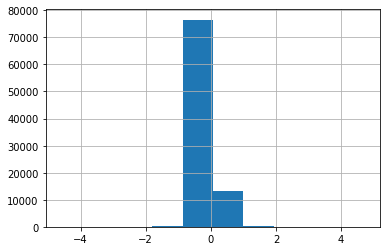

In [29]:
reduced_df.logerror.hist()
plt.show()

The Target looks a bit like Laplace Distribution. We should keep that in mind as we chose ML algorithms and corresponding loss functions. If we plot on a log-scale, the target looks closer to a Normal Distribution.

Laplace Distribution is the double exponential distribution, because it can be thought of as two exponential distributions (with an additional location parameter) spliced together back-to-back.

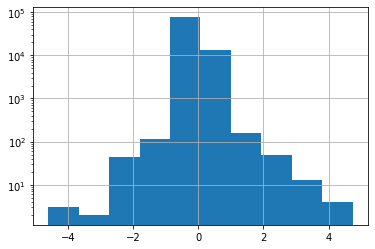

In [31]:
fig, ax = plt.subplots()
reduced_df.logerror.hist(ax=ax)
ax.set_yscale('log')
plt.show()